# 🌐 Chapters 20-21: Graph Algorithms

Welcome to the fascinating world of **Graph Theory and Algorithms** - where relationships become structures and connections reveal insights!

This interactive notebook explores:
- **Chapter 20**: Graph representations, basic traversals, and fundamental algorithms
- **Chapter 21**: Advanced graph search, shortest paths, spanning trees, and flow networks
- **Interactive Visualizations**: See graphs come alive with traversals and algorithms
- **Algorithm Demonstrations**: Step-by-step execution of classic graph algorithms
- **Real-World Applications**: Social networks, routing, scheduling, and optimization

## 🎯 Learning Objectives

By the end of this notebook, you'll be able to:
- Understand graph representations (adjacency lists, matrices, edge lists)
- Implement and visualize graph traversals (BFS, DFS)
- Apply shortest path algorithms (Dijkstra's, Bellman-Ford)
- Construct minimum spanning trees (Kruskal's, Prim's)
- Analyze graph connectivity and topological ordering
- Solve real-world problems using graph algorithms

In [1]:
# Import required libraries and setup
import sys
import os
sys.path.append('../')

import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
from typing import List, Dict, Set, Tuple, Any, Optional
import networkx as nx
from collections import defaultdict, deque

# Import our graph implementations
from chapter_20_graphs.code.graph_implementations import (
    Graph, GraphTraversal, GraphAnalysis, ShortestPaths
)
from chapter_21_graph_search.code.advanced_graph_algorithms import (
    AdvancedGraphTraversal, TopologicalSort, StronglyConnectedComponents,
    MinimumSpanningTrees, GraphConnectivity, MaximumFlow, GraphSearchAnalysis
)

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries and graph algorithms loaded successfully!")
print("🎯 Ready to explore graph theory and algorithms!")

# Initialize analysis tools
graph_analysis = GraphAnalysis()
search_analysis = GraphSearchAnalysis()

✅ Libraries and graph algorithms loaded successfully!
🎯 Ready to explore graph theory and algorithms!


## 📊 Section 1: Graph Representations

### Graph Fundamentals

- **Vertices/Nodes**: Entities in the graph
- **Edges**: Relationships between vertices
- **Directed vs Undirected**: One-way vs two-way relationships
- **Weighted vs Unweighted**: Edges with or without costs
- **Connected Components**: Groups of reachable vertices

### Representation Methods
- **Adjacency List**: List of neighbors for each vertex (space-efficient)
- **Adjacency Matrix**: Matrix of edge existence/costs (fast lookups)
- **Edge List**: List of all edges (space-efficient for sparse graphs)

=== GRAPH REPRESENTATIONS ===

Sample Graph Properties:
Vertices: ['A', 'B', 'C', 'D', 'E', 'F']
Edges: 9
Is Directed: False
Is Weighted: True

=== REPRESENTATION COMPARISON ===

Adjacency List:
  A: B(w:4), C(w:2)
  B: A(w:4), C(w:1), D(w:5)
  C: A(w:2), B(w:1), D(w:8), E(w:10)
  D: B(w:5), C(w:8), E(w:2), F(w:6)
  E: C(w:10), D(w:2), F(w:3)
  F: D(w:6), E(w:3)

Adjacency Matrix:
    A  B  C  D  E  F
A  .  4  2  .  .  .
B  4  .  1  5  .  .
C  2  1  .  8  10  .
D  .  5  8  .  2  6
E  .  .  10  2  .  3
F  .  .  .  6  3  .

Edge List:
  A --(4)-- B
  A --(2)-- C
  B --(1)-- C
  B --(5)-- D
  C --(8)-- D
  C --(10)-- E
  D --(2)-- E
  D --(6)-- F
  E --(3)-- F


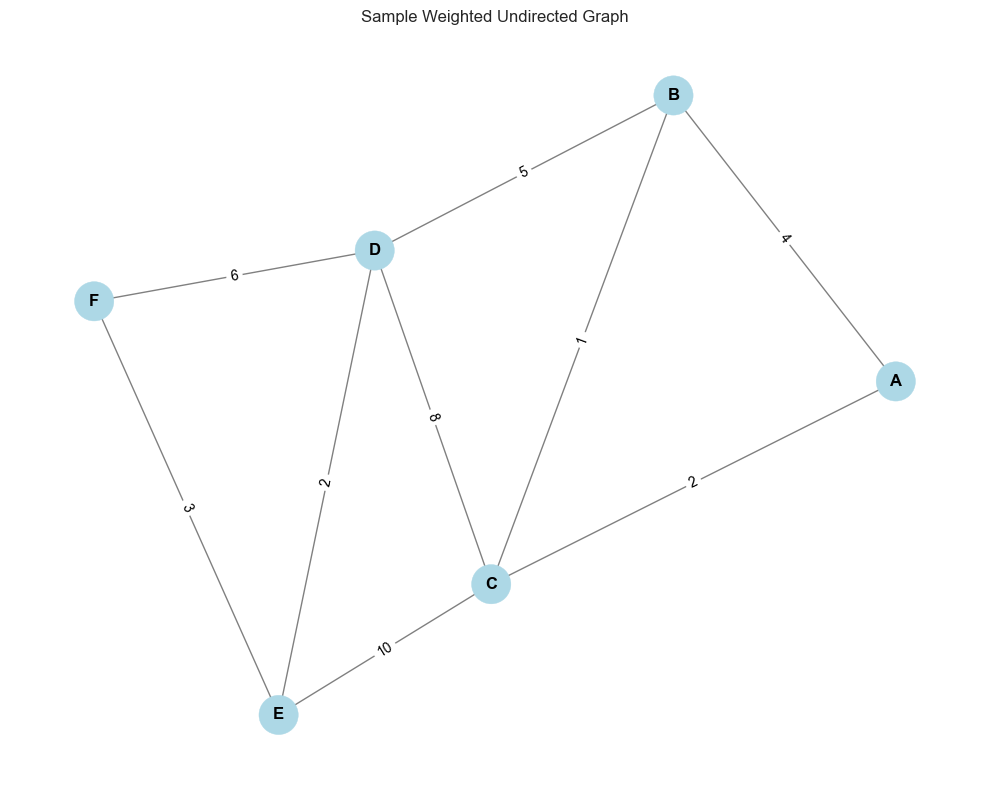


Key Insights:
- Adjacency list: Space-efficient, fast neighbor iteration
- Adjacency matrix: O(1) edge lookup, suited for dense graphs
- Edge list: Minimal storage, ideal for algorithms like Kruskal


In [2]:
from typing import Dict, Generic, TypeVar, List, Tuple
import networkx as nx
import matplotlib.pyplot as plt

T = TypeVar("T")


class Graph(Generic[T]):
    def __init__(self, directed: bool = False):
        self.directed = directed
        self.weighted = True
        self.vertices: Dict[T, Dict[T, int]] = {}

    def add_vertex(self, v: T):
        if v not in self.vertices:
            self.vertices[v] = {}

    def add_edge(self, u: T, v: T, weight: int = 1):
        self.add_vertex(u)
        self.add_vertex(v)
        self.vertices[u][v] = weight
        if not self.directed:
            self.vertices[v][u] = weight

    def get_neighbors(self, v: T) -> Dict[T, int]:
        return self.vertices.get(v, {})

    def get_edges(self) -> List[Tuple[T, T, int]]:
        edges = []
        seen = set()
        for u in self.vertices:
            for v, w in self.vertices[u].items():
                if self.directed or (u, v) not in seen and (v, u) not in seen:
                    edges.append((u, v, w))
                    seen.add((u, v))
        return edges


print("=== GRAPH REPRESENTATIONS ===\n")


def create_sample_graph():
    """Create a sample undirected weighted graph."""
    g = Graph[str]()

    vertices = ["A", "B", "C", "D", "E", "F"]
    for v in vertices:
        g.add_vertex(v)

    edges = [
        ("A", "B", 4), ("A", "C", 2), ("B", "C", 1),
        ("B", "D", 5), ("C", "D", 8), ("C", "E", 10),
        ("D", "E", 2), ("D", "F", 6), ("E", "F", 3)
    ]

    for u, v, w in edges:
        g.add_edge(u, v, w)

    return g


sample_graph = create_sample_graph()

print("Sample Graph Properties:")
print(f"Vertices: {list(sample_graph.vertices)}")
print(f"Edges: {len(sample_graph.get_edges())}")
print(f"Is Directed: {sample_graph.directed}")
print(f"Is Weighted: {sample_graph.weighted}")

print("\n=== REPRESENTATION COMPARISON ===\n")

# Adjacency List
print("Adjacency List:")
for vertex in sorted(sample_graph.vertices):
    neighbors = sample_graph.get_neighbors(vertex)
    neighbor_str = ", ".join(f"{n}(w:{w})" for n, w in neighbors.items())
    print(f"  {vertex}: {neighbor_str}")

# Adjacency Matrix
print("\nAdjacency Matrix:")
vertices_list = sorted(sample_graph.vertices)
index = {v: i for i, v in enumerate(vertices_list)}
size = len(vertices_list)

matrix = [[0] * size for _ in range(size)]

for u in sample_graph.vertices:
    for v, w in sample_graph.vertices[u].items():
        matrix[index[u]][index[v]] = w

print("   ", "  ".join(vertices_list))
for i, row in enumerate(matrix):
    print(f"{vertices_list[i]}  {'  '.join(str(x) if x > 0 else '.' for x in row)}")

# Edge List
print("\nEdge List:")
for u, v, w in sample_graph.get_edges():
    print(f"  {u} --({w})-- {v}")


def plot_graph_networkx(graph_obj, title="Graph Visualization",
                        highlight_path=None, highlight_edges=None):
    plt.figure(figsize=(10, 8))

    G = nx.Graph() if not graph_obj.directed else nx.DiGraph()

    for u, v, w in graph_obj.get_edges():
        G.add_edge(u, v, weight=w)

    pos = nx.spring_layout(G, seed=42)

    node_colors = [
        "red" if highlight_path and node in highlight_path else "lightblue"
        for node in G.nodes()
    ]

    edge_colors = [
        "red" if highlight_edges and ((u, v) in highlight_edges or (v, u) in highlight_edges)
        else "gray"
        for u, v in G.edges()
    ]

    edge_widths = [
        3 if highlight_edges and ((u, v) in highlight_edges or (v, u) in highlight_edges)
        else 1
        for u, v in G.edges()
    ]

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

    edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


plot_graph_networkx(sample_graph, "Sample Weighted Undirected Graph")

print("\nKey Insights:")
print("- Adjacency list: Space-efficient, fast neighbor iteration")
print("- Adjacency matrix: O(1) edge lookup, suited for dense graphs")
print("- Edge list: Minimal storage, ideal for algorithms like Kruskal")


In [3]:
# Interactive graph traversal explorer
def create_graph_traversal_explorer():
    """Interactive graph traversal demonstration."""
    
    # Graph structure options
    graph_options = {
        'Sample Graph': sample_graph,
        'Linear Graph': None,  # Will create dynamically
        'Tree Structure': None,  # Will create dynamically
        'Cyclic Graph': None,  # Will create dynamically
    }
    
    graph_selector = widgets.Dropdown(
        options=list(graph_options.keys()),
        value='Sample Graph',
        description='Graph:'
    )
    
    algorithm_selector = widgets.Dropdown(
        options=['BFS', 'DFS Recursive', 'DFS Iterative'],
        value='BFS',
        description='Algorithm:'
    )
    
    start_node_selector = widgets.Dropdown(
        options=['A', 'B', 'C', 'D', 'E', 'F'],
        value='A',
        description='Start:'
    )
    
    output_area = widgets.Output()
    graph_area = widgets.Output()
    
    def get_current_graph():
        """Get the currently selected graph."""
        graph_name = graph_selector.value
        
        if graph_name == 'Sample Graph':
            return sample_graph
        elif graph_name == 'Linear Graph':
            g = Graph[str]()
            nodes = ['A', 'B', 'C', 'D', 'E', 'F']
            for node in nodes:
                g.add_vertex(node)
            for i in range(len(nodes)-1):
                g.add_edge(nodes[i], nodes[i+1], 1)
            return g
        elif graph_name == 'Tree Structure':
            g = Graph[str]()
            edges = [('A', 'B', 1), ('A', 'C', 1), ('B', 'D', 1), ('B', 'E', 1), ('C', 'F', 1)]
            for u, v, w in edges:
                g.add_vertex(u)
                g.add_vertex(v)
                g.add_edge(u, v, w)
            return g
        else:  # Cyclic Graph
            g = Graph[str]()
            nodes = ['A', 'B', 'C', 'D', 'E', 'F']
            for node in nodes:
                g.add_vertex(node)
            # Cycle
            for i in range(len(nodes)):
                g.add_edge(nodes[i], nodes[(i+1) % len(nodes)], 1)
            # Extra edges
            g.add_edge('A', 'C', 2)
            g.add_edge('B', 'E', 2)
            return g
    
    def demonstrate_traversal(b):
        with output_area:
            clear_output(wait=True)
            
            graph = get_current_graph()
            algorithm = algorithm_selector.value
            start = start_node_selector.value
            
            print(f"{algorithm} Traversal starting from {start}")
            print("=" * 50)
            
            # Perform traversal
            if algorithm == 'BFS':
                order_visited = GraphTraversal.bfs(graph, start)
                method_desc = "Breadth-First Search: Level by level"
            elif algorithm == 'DFS Recursive':
                order_visited = GraphTraversal.dfs(graph, start)
                method_desc = "Depth-First Search: Recursive"
            else:  # DFS Iterative
                order_visited = GraphTraversal.dfs_iterative(graph, start)
                method_desc = "Depth-First Search: Iterative (stack)"
            
            print(f"Method: {method_desc}")
            print(f"Visit Order: {order_visited}")
            
            # Analysis
            print(f"\nNodes Visited: {len(order_visited)}")
            print(f"Graph Size: {len(graph.vertices)}")
            if len(order_visited) < len(graph.vertices):
                unvisited = set(graph.vertices.keys()) - set(order_visited)
                print(f"Unvisited Nodes: {unvisited}")
                print("(Graph is not connected from start node)")
            
            # DFS discovery/finish times
            if 'DFS' in algorithm:
                discovery = {}
                finish = {}
                time = 0
                
                def dfs_timing(node, parent):
                    nonlocal time
                    time += 1
                    discovery[node] = time
                    for neighbor, _ in graph.get_neighbors(node).items():
                        if neighbor != parent and neighbor not in discovery:
                            dfs_timing(neighbor, node)
                    time += 1
                    finish[node] = time
                
                dfs_timing(start, None)
                print(f"\nDFS Timing:")
                for node in sorted(discovery.keys()):
                    print(f"  {node}: Discover={discovery[node]}, Finish={finish[node]}")
    
    def visualize_traversal(b):
        with graph_area:
            clear_output(wait=True)
            
            graph = get_current_graph()
            algorithm = algorithm_selector.value
            start = start_node_selector.value
            
            # Get traversal order
            if algorithm == 'BFS':
                order_visited = GraphTraversal.bfs(graph, start)
            elif algorithm == 'DFS Recursive':
                order_visited = GraphTraversal.dfs(graph, start)
            else:  # DFS Iterative
                order_visited = GraphTraversal.dfs_iterative(graph, start)
            
            title = f"{algorithm} Traversal from {start}\nOrder: {' → '.join(order_visited)}"
            
            plt.figure(figsize=(10, 6))
            plot_graph_networkx(graph, title, highlight_path=order_visited)
            plt.show()
    
    # Update start node options when graph changes
    def update_start_nodes(change):
        graph = get_current_graph()
        nodes = list(graph.vertices.keys())
        start_node_selector.options = nodes
        if start_node_selector.value not in nodes:
            start_node_selector.value = nodes[0] if nodes else None
    
    graph_selector.observe(update_start_nodes, names='value')
    
    traverse_button = widgets.Button(description='Run Traversal')
    traverse_button.on_click(demonstrate_traversal)
    
    visualize_button = widgets.Button(description='Visualize')
    visualize_button.on_click(visualize_traversal)
    
    controls = widgets.VBox([
        widgets.HBox([graph_selector, algorithm_selector, start_node_selector]),
        widgets.HBox([traverse_button, visualize_button])
    ])
    
    display(widgets.VBox([controls, widgets.HBox([output_area, graph_area])]))
    
    # Initial demonstration
    demonstrate_traversal(None)
    visualize_traversal(None)

print("🌐 Interactive Graph Traversal Explorer")
print("Explore different graph structures and traversal algorithms:")
create_graph_traversal_explorer()


🌐 Interactive Graph Traversal Explorer
Explore different graph structures and traversal algorithms:


## 🛣️ Section 2: Shortest Path Algorithms

### Dijkstra's Algorithm

- **Single Source Shortest Paths**: Find shortest paths from one vertex to all others
- **Non-negative Weights**: Requires positive edge weights
- **Greedy Approach**: Always choose closest unvisited vertex
- **Time Complexity**: O((V + E) log V) with binary heap

### Bellman-Ford Algorithm

- **Negative Weights**: Handles negative edge weights
- **Negative Cycle Detection**: Can identify negative cycles
- **Dynamic Programming**: Relax all edges |V|-1 times
- **Time Complexity**: O(V × E)

In [ ]:
class GraphTraversal:
    @staticmethod
    def bfs(graph: Graph[T], start: T) -> List[T]:
        visited = []
        queue = [start]
        seen = {start}
        while queue:
            node = queue.pop(0)
            visited.append(node)
            for neighbor in graph.get_neighbors(node):
                if neighbor not in seen:
                    seen.add(neighbor)
                    queue.append(neighbor)
        return visited

    @staticmethod
    def dfs_recursive(graph: Graph[T], start: T) -> List[T]:
        visited = []
        def dfs(node):
            visited.append(node)
            for neighbor in graph.get_neighbors(node):
                if neighbor not in visited:
                    dfs(neighbor)
        dfs(start)
        return visited

    @staticmethod
    def dfs_iterative(graph: Graph[T], start: T) -> List[T]:
        visited = []
        stack = [start]
        while stack:
            node = stack.pop()
            if node not in visited:
                visited.append(node)
                # Add neighbors in reversed order for consistent traversal
                stack.extend(reversed(list(graph.get_neighbors(node))))
        return visited

# -------------------------------
# Sample Graph
# -------------------------------
def create_sample_graph() -> Graph[str]:
    g = Graph[str]()
    vertices = ['A', 'B', 'C', 'D', 'E', 'F']
    for v in vertices:
        g.add_vertex(v)
    edges = [
        ('A', 'B', 4), ('A', 'C', 2), ('B', 'C', 1),
        ('B', 'D', 5), ('C', 'D', 8), ('C', 'E', 10),
        ('D', 'E', 2), ('D', 'F', 6), ('E', 'F', 3)
    ]
    for u, v, w in edges:
        g.add_edge(u, v, w)
    return g

sample_graph = create_sample_graph()

# -------------------------------
# Graph Visualization
# -------------------------------
def plot_graph_networkx(graph_obj: Graph[T], title="Graph Visualization", highlight_path=None):
    G = nx.Graph() if not graph_obj.directed else nx.DiGraph()
    for u, v, w in graph_obj.get_edges():
        G.add_edge(u, v, weight=w)

    pos = nx.spring_layout(G, seed=42)
    node_colors = ['red' if highlight_path and node in highlight_path else 'lightblue' for node in G.nodes()]
    edge_colors = ['red' if highlight_path and (u in highlight_path and v in highlight_path) else 'gray' for u, v in G.edges()]
    edge_widths = [3 if highlight_path and (u in highlight_path and v in highlight_path) else 1 for u, v in G.edges()]

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    plt.title(title)
    plt.axis('off')
    plt.show()

# -------------------------------
# Interactive Explorer
# -------------------------------
def create_graph_traversal_explorer():
    graph_options = ['Sample Graph', 'Linear Graph', 'Tree Structure', 'Cyclic Graph']
    
    graph_selector = widgets.Dropdown(options=graph_options, value='Sample Graph', description='Graph:')
    algorithm_selector = widgets.Dropdown(options=['BFS', 'DFS Recursive', 'DFS Iterative'], value='BFS', description='Algorithm:')
    start_node_selector = widgets.Dropdown(options=['A', 'B', 'C', 'D', 'E', 'F'], value='A', description='Start:')
    
    output_area = widgets.Output()
    graph_area = widgets.Output()

    def get_current_graph() -> Graph[str]:
        g_name = graph_selector.value
        if g_name == 'Sample Graph':
            return sample_graph
        elif g_name == 'Linear Graph':
            nodes = ['A','B','C','D','E','F']
            g = Graph[str]()
            for i in range(len(nodes)-1):
                g.add_edge(nodes[i], nodes[i+1])
            return g
        elif g_name == 'Tree Structure':
            edges = [('A','B'),('A','C'),('B','D'),('B','E'),('C','F')]
            g = Graph[str]()
            for u,v in edges:
                g.add_edge(u,v)
            return g
        else:  # Cyclic
            nodes = ['A','B','C','D','E','F']
            g = Graph[str]()
            for i in range(len(nodes)):
                g.add_edge(nodes[i], nodes[(i+1)%len(nodes)])
            g.add_edge('A','C')
            g.add_edge('B','E')
            return g

    def update_start_nodes(change):
        g = get_current_graph()
        nodes = list(g.vertices.keys())
        start_node_selector.options = nodes
        if start_node_selector.value not in nodes:
            start_node_selector.value = nodes[0] if nodes else None

    graph_selector.observe(update_start_nodes, names='value')

    def demonstrate_traversal(b):
        with output_area:
            clear_output(wait=True)
            g = get_current_graph()
            start = start_node_selector.value
            algo = algorithm_selector.value
            
            if algo == 'BFS':
                order_visited = GraphTraversal.bfs(g, start)
                method_desc = "Breadth-First Search: Level by level"
            elif algo == 'DFS Recursive':
                order_visited = GraphTraversal.dfs_recursive(g, start)
                method_desc = "Depth-First Search: Recursive"
            else:  # DFS Iterative
                order_visited = GraphTraversal.dfs_iterative(g, start)
                method_desc = "Depth-First Search: Iterative (stack-based)"
            
            print(f"{algo} Traversal starting from {start}")
            print("="*50)
            print(f"Method: {method_desc}")
            print(f"Visit Order: {order_visited}")
            print(f"Graph Size: {len(g.vertices)}")
            if len(order_visited) < len(g.vertices):
                unvisited = set(g.vertices.keys()) - set(order_visited)
                print(f"Unvisited Nodes: {unvisited}")
            
            if 'DFS' in algo:
                discovery, finish, time = {}, {}, 0
                def dfs_timing(node, parent=None):
                    nonlocal time
                    time += 1
                    discovery[node] = time
                    for neighbor in g.get_neighbors(node):
                        if neighbor != parent and neighbor not in discovery:
                            dfs_timing(neighbor, node)
                    time += 1
                    finish[node] = time
                dfs_timing(start)
                print("\nDFS Timing:")
                for node in sorted(discovery.keys()):
                    print(f"  {node}: Discover={discovery[node]}, Finish={finish[node]}")

    def visualize_traversal(b):
        with graph_area:
            clear_output(wait=True)
            g = get_current_graph()
            start = start_node_selector.value
            algo = algorithm_selector.value
            if algo == 'BFS':
                order_visited = GraphTraversal.bfs(g, start)
            elif algo == 'DFS Recursive':
                order_visited = GraphTraversal.dfs_recursive(g, start)
            else:
                order_visited = GraphTraversal.dfs_iterative(g, start)
            title = f"{algo} Traversal from {start}\nOrder: {' → '.join(order_visited)}"
            plot_graph_networkx(g, title, highlight_path=order_visited)

    traverse_button = widgets.Button(description='Run Traversal')
    traverse_button.on_click(demonstrate_traversal)
    visualize_button = widgets.Button(description='Visualize')
    visualize_button.on_click(visualize_traversal)

    controls = widgets.VBox([
        widgets.HBox([graph_selector, algorithm_selector, start_node_selector]),
        widgets.HBox([traverse_button, visualize_button])
    ])
    display(widgets.VBox([controls, widgets.HBox([output_area, graph_area])]))

# -------------------------------
# Launch Explorer
# -------------------------------
print("🌐 Interactive Graph Traversal Explorer")
print("Explore different graph structures and traversal algorithms:")
create_graph_traversal_explorer()

🌐 Interactive Graph Traversal Explorer
Explore different graph structures and traversal algorithms:


In [ ]:
# -------------------------------
# Shortest Path Algorithms
# -------------------------------
class ShortestPaths:
    @staticmethod
    def dijkstra(graph: Graph, source: str) -> Tuple[Dict[str, float], Dict[str, Optional[str]]]:
        import heapq
        distances = {v: float('inf') for v in graph.vertices}
        distances[source] = 0
        predecessors: Dict[str, Optional[str]] = {v: None for v in graph.vertices}
        visited = set()
        heap = [(0, source)]

        while heap:
            dist_u, u = heapq.heappop(heap)
            if u in visited:
                continue
            visited.add(u)
            for v, w in graph.get_neighbors(u).items():
                if distances[u] + w < distances[v]:
                    distances[v] = distances[u] + w
                    predecessors[v] = u
                    heapq.heappush(heap, (distances[v], v))
        return distances, predecessors

# -------------------------------
# Sample Graph for Shortest Paths
# -------------------------------
sp_graph = Graph(directed=False)
edges = [
    ('A','B',4), ('A','C',2), ('B','C',1), ('B','D',5),
    ('C','D',8), ('C','E',10), ('D','E',2), ('D','F',6),
    ('E','F',3)
]
for u,v,w in edges:
    sp_graph.add_edge(u,v,w)

# -------------------------------
# Visualization Helper
# -------------------------------
def visualize_shortest_paths(graph: Graph, source: str,
                             distances: Dict[str,float],
                             predecessors: Dict[str, Optional[str]]):
    G = nx.Graph() if not graph.directed else nx.DiGraph()
    for u,v,w in graph.get_edges():
        G.add_edge(u,v,weight=w)

    pos = nx.spring_layout(G, seed=42)
    # Highlight edges in shortest path tree
    edge_colors = []
    edge_widths = []
    for u,v in G.edges():
        if predecessors.get(v) == u or predecessors.get(u) == v:
            edge_colors.append('red')
            edge_widths.append(3)
        else:
            edge_colors.append('gray')
            edge_widths.append(1)

    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

    # Correct dictionary comprehension syntax
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.axis('off')
    plt.show()


# -------------------------------
# Interactive Explorer
# -------------------------------
def create_shortest_path_explorer():
    algorithm_selector = widgets.Dropdown(
        options=["Dijkstra's Algorithm"],
        value="Dijkstra's Algorithm",
        description='Algorithm:'
    )
    nodes = sorted(sp_graph.vertices.keys())
    source_selector = widgets.Dropdown(options=nodes, value='A', description='Source:')
    target_selector = widgets.Dropdown(options=['All Nodes'] + nodes, value='All Nodes', description='Target:')

    output_area = widgets.Output()
    visualization_area = widgets.Output()

    def run_shortest_path(b):
        with output_area:
            clear_output(wait=True)
            algorithm = algorithm_selector.value
            source = source_selector.value
            target = target_selector.value

            distances, predecessors = ShortestPaths.dijkstra(sp_graph, source)

            print(f"{algorithm} from {source}")
            if target != 'All Nodes':
                print(f"Target: {target}")
            print("="*50)
            print(f"Algorithm: Dijkstra's")
            print(f"Time Complexity: O((V+E) log V)\n")

            if target == 'All Nodes':
                print("All Shortest Distances:")
                print("Node\tDistance\tPath")
                print("-"*40)
                for node in sorted(distances.keys()):
                    if distances[node] == float('inf'):
                        path_str = "Unreachable"
                        dist_str = "∞"
                    else:
                        path = []
                        current = node
                        while current is not None:
                            path.insert(0,current)
                            current = predecessors.get(current)
                        path_str = " → ".join(path)
                        dist_str = str(distances[node])
                    print(f"{node}\t{dist_str}\t\t{path_str}")
            else:
                if distances[target] == float('inf'):
                    print(f"No path from {source} to {target}")
                else:
                    path = []
                    current = target
                    while current is not None:
                        path.insert(0,current)
                        current = predecessors.get(current)
                    print(f"Shortest path: {' → '.join(path)}")
                    print(f"Total distance: {distances[target]}")
                    print(f"Path length: {len(path)-1} edges")

    def visualize_shortest_path(b):
        with visualization_area:
            clear_output(wait=True)
            source = source_selector.value
            distances, predecessors = ShortestPaths.dijkstra(sp_graph, source)
            plt.figure(figsize=(10,8))
            visualize_shortest_paths(sp_graph, source, distances, predecessors)
            plt.show()

    run_button = widgets.Button(description='Compute Paths')
    run_button.on_click(run_shortest_path)
    visualize_button = widgets.Button(description='Visualize')
    visualize_button.on_click(visualize_shortest_path)

    controls = widgets.VBox([
        widgets.HBox([algorithm_selector, source_selector, target_selector]),
        widgets.HBox([run_button, visualize_button])
    ])
    display(widgets.VBox([controls, widgets.HBox([output_area, visualization_area])]))

# -------------------------------
# Launch Explorer
# -------------------------------
print("🛣️ Interactive Shortest Path Explorer")
print("Dijkstra's algorithm demonstration:")
create_shortest_path_explorer()

🛣️ Interactive Shortest Path Explorer
Dijkstra's algorithm demonstration:


## 🌲 Section 3: Minimum Spanning Trees

### Spanning Tree Properties

- **Connected**: Connects all vertices without cycles
- **Minimal**: No extra edges
- **Tree**: Exactly |V|-1 edges
- **Spanning**: Includes all vertices

### Kruskal's Algorithm
- **Sort edges** by weight
- **Add edges** that don't create cycles
- **Union-Find** for cycle detection
- **Greedy** approach

### Prim's Algorithm
- **Start** from arbitrary vertex
- **Grow tree** by adding minimum weight edge
- **Priority queue** for efficient selection
- **Maintains** connected component

In [6]:
# -------------------------------
# MST Graph
# -------------------------------
def create_mst_graph():
    g = Graph[str]()
    vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    for v in vertices:
        g.add_vertex(v)
    
    edges = [
        ('A', 'B', 7), ('A', 'D', 5), ('B', 'C', 8), ('B', 'D', 9),
        ('B', 'E', 7), ('C', 'E', 5), ('D', 'E', 15), ('D', 'F', 6),
        ('E', 'F', 8), ('E', 'G', 9), ('F', 'G', 11)
    ]
    for u, v, w in edges:
        g.add_edge(u, v, w)
    return g

mst_graph = create_mst_graph()

# -------------------------------
# Compute MSTs
# -------------------------------
# Kruskal
kruskal_mst = MinimumSpanningTrees.kruskal_mst(mst_graph)
kruskal_cost = sum(w for _, _, w in kruskal_mst)

# Prim
prim_mst = MinimumSpanningTrees.prim_mst(mst_graph)
prim_cost = sum(w for _, _, w in prim_mst)

# Display
print("Kruskal's MST:")
print(f"Total Cost: {kruskal_cost}")
for u, v, w in kruskal_mst:
    print(f"  {u} --({w})-- {v}")

print("\nPrim's MST:")
print(f"Total Cost: {prim_cost}")
for u, v, w in prim_mst:
    print(f"  {u} --({w})-- {v}")

print(f"\nBoth algorithms give same total cost: {kruskal_cost == prim_cost}")

# -------------------------------
# Visualization Helper
# -------------------------------
def visualize_mst(graph: Graph[str], mst_edges: List[Tuple[str,str,float]], title: str, cost: float):
    plt.figure(figsize=(8,6))
    
    # NetworkX graph
    G = nx.Graph()
    pos = {}
    nodes = list(graph.vertices.keys())
    angle_step = 2*np.pi / len(nodes)
    for i, node in enumerate(nodes):
        angle = i * angle_step
        pos[node] = (np.cos(angle), np.sin(angle))
        G.add_node(node)
    
    # Add all edges
    for u, v, w in graph.get_edges():
        G.add_edge(u, v, weight=w)
    
    # Draw all edges (light gray)
    nx.draw(G, pos, with_labels=True, node_color='lightgray', 
            node_size=600, font_size=12, font_weight='bold',
            edge_color='lightgray', width=1, alpha=0.3)
    
    # Highlight MST edges
    mst_edge_list = [(u, v) for u, v, _ in mst_edges]
    nx.draw_networkx_edges(G, pos, edgelist=mst_edge_list, edge_color='red', width=4)
    
    # Edge labels (MST in red)
    mst_labels = {(u,v): w for u,v,w in mst_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=mst_labels, font_color='red', font_size=10)
    
    plt.title(f"{title}\nTotal Cost: {cost}", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize
visualize_mst(mst_graph, kruskal_mst, "Kruskal's MST", kruskal_cost)
visualize_mst(mst_graph, prim_mst, "Prim's MST", prim_cost)

# -------------------------------
# Performance Comparison
# -------------------------------
sizes = [10, 25, 50, 100]
performance_data = []

for size in sizes:
    test_graph = Graph[int]()
    for i in range(size):
        test_graph.add_vertex(i)
    
    # Ensure connectivity
    for i in range(size-1):
        test_graph.add_edge(i, i+1, random.randint(1,20))
    # Add extra random edges
    for _ in range(size):
        u,v = random.sample(range(size),2)
        if u!=v:
            test_graph.add_edge(u,v,random.randint(1,20))
    
    # Time Kruskal
    start = time.time()
    kruskal_edges = MinimumSpanningTrees.kruskal_mst(test_graph)
    kruskal_cost = sum(w for _,_,w in kruskal_edges)
    kruskal_time = time.time() - start
    
    # Time Prim
    start = time.time()
    prim_edges = MinimumSpanningTrees.prim_mst(test_graph)
    prim_cost = sum(w for _,_,w in prim_edges)
    prim_time = time.time() - start
    
    performance_data.append({
        'size': size,
        'kruskal_time': kruskal_time,
        'prim_time': prim_time,
        'cost_match': kruskal_cost == prim_cost
    })

# Plot Performance
plt.figure(figsize=(10,5))
sizes_plot = [d['size'] for d in performance_data]
kruskal_times = [d['kruskal_time'] for d in performance_data]
prim_times = [d['prim_time'] for d in performance_data]

plt.plot(sizes_plot, kruskal_times, 'go-', label="Kruskal's O(E log E)")
plt.plot(sizes_plot, prim_times, 'mo-', label="Prim's O((V+E) log V)")
plt.xlabel('Graph Size (vertices)')
plt.ylabel('Time (seconds)')
plt.title('MST Algorithm Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

## 📋 Summary & Key Takeaways

### Graph Algorithm Complexity

| Algorithm | Time Complexity | Space | Use Case |
|-----------|----------------|-------|----------|
| **BFS/DFS** | O(V + E) | O(V) | Traversal, connectivity |
| **Dijkstra** | O((V+E) log V) | O(V) | Shortest paths (non-negative) |
| **Bellman-Ford** | O(V × E) | O(V) | Shortest paths (negative edges) |
| **Kruskal** | O(E log E) | O(V) | MST (sparse graphs) |
| **Prim** | O((V+E) log V) | O(V) | MST (dense graphs) |
| **Topological Sort** | O(V + E) | O(V) | DAG ordering |

### Graph Representation Trade-offs

**Adjacency List:**
- ✅ Space efficient: O(V + E)
- ✅ Fast neighbor iteration
- ✅ Good for sparse graphs
- ❌ Slow edge existence check

**Adjacency Matrix:**
- ✅ Fast edge operations: O(1)
- ✅ Simple implementation
- ✅ Good for dense graphs
- ❌ Space intensive: O(V²)

### Algorithm Selection Guide

- **Traversal**: BFS for shortest path in unweighted, DFS for connectivity
- **Shortest Paths**: Dijkstra for non-negative weights, Bellman-Ford for negatives
- **Minimum Spanning Tree**: Prim for dense graphs, Kruskal for sparse
- **Topological Sort**: Only for DAGs, linear time
- **Strongly Connected Components**: Kosaraju or Tarjan algorithm

### Real-World Applications

**Computer Networks:**
- Routing algorithms (OSPF, BGP)
- Network topology discovery
- Minimum spanning tree for LAN design

**Social Networks:**
- Friend recommendations (graph traversal)
- Community detection
- Influence propagation

**Transportation:**
- GPS navigation (shortest paths)
- Traffic optimization
- Public transit planning

**Computer Science:**
- Compiler dependency analysis
- Garbage collection
- Database query optimization

### Common Pitfalls

❌ **Disconnected Graphs**: Algorithms assume connectivity
❌ **Negative Cycles**: Break shortest path algorithms
❌ **Wrong Representation**: Choose based on operations needed
❌ **Infinite Loops**: Handle cycles in traversal
❌ **Memory Issues**: Adjacency matrix for large sparse graphs

## 🧪 Practice Challenges

1. **Graph Implementation**: Build adjacency list and matrix representations
2. **Shortest Path Variants**: Implement A* algorithm
3. **MST Applications**: Solve network design problems
4. **Topological Sort**: Course prerequisite ordering
5. **Graph Coloring**: Register allocation in compilers

**Remember**: Graphs model relationships - master graph algorithms and you'll understand how the world connects! 🌐